In [1]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")
symbol = "AAPL"

# print(api_key)

url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
data = requests.get(url).json()
#ALPHA_API_KEY

In [5]:
df = pd.DataFrame(data['Time Series (Daily)']).transpose().astype(float)
df.head()

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    5536 non-null   float64
 1   2. high    5536 non-null   float64
 2   3. low     5536 non-null   float64
 3   4. close   5536 non-null   float64
 4   5. volume  5536 non-null   float64
dtypes: float64(5)
memory usage: 259.5+ KB


In [9]:
df.index

Index(['2021-10-29', '2021-10-28', '2021-10-27', '2021-10-26', '2021-10-25',
       '2021-10-22', '2021-10-21', '2021-10-20', '2021-10-19', '2021-10-18',
       ...
       '1999-11-12', '1999-11-11', '1999-11-10', '1999-11-09', '1999-11-08',
       '1999-11-05', '1999-11-04', '1999-11-03', '1999-11-02', '1999-11-01'],
      dtype='object', length=5536)

In [11]:
df.index = pd.to_datetime(df.index)
print(df.index.dtype)
df.head()

datetime64[ns]


,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0


In [12]:
df.loc["2021"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.9400,146.4128,149.80,124953168.0
2021-10-28,149.820,153.1650,149.7200,152.57,100077888.0
2021-10-27,149.360,149.7300,148.4900,148.85,56094929.0
2021-10-26,149.330,150.8400,149.0101,149.32,60893395.0
2021-10-25,148.680,149.3700,147.6211,148.64,50720556.0
...,...,...,...,...,...
2021-01-08,132.430,132.6300,130.2300,132.05,105158245.0
2021-01-07,128.360,131.6300,127.8600,130.92,109578157.0
2021-01-06,127.720,131.0499,126.3820,126.60,155087970.0
2021-01-05,128.890,131.7400,128.4300,131.01,97664898.0


In [15]:
df.loc["2021-10-20":"2021-10-29"]

,1. open,2. high,3. low,4. close,5. volume
2021-10-29,147.215,149.940,146.4128,149.80,124953168.0
2021-10-28,149.820,153.165,149.7200,152.57,100077888.0
2021-10-27,149.360,149.730,148.4900,148.85,56094929.0
2021-10-26,149.330,150.840,149.0101,149.32,60893395.0
2021-10-25,148.680,149.370,147.6211,148.64,50720556.0
2021-10-22,149.690,150.180,148.6400,148.69,58883443.0
2021-10-21,148.810,149.640,147.8700,149.48,61420990.0


In [2]:
import requests
from dotenv import load_dotenv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

load_dotenv()
api_key = os.getenv("ALPHA_API_KEY")

symbols = ["AAPL", "TSLA", "NVDA", "IBM"]
stock_list = []

# print(api_key)
for symbol in symbols:
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&outputsize=full&apikey={api_key}"
    data = requests.get(url).json()
    df = pd.DataFrame(data["Time Series (Daily)"]).transpose()
    df = df["4. close"].rename(symbol).astype(float)
    stock_list.append(df)
    time.sleep(20)


In [3]:
stock_list

[2021-10-29    149.80
 2021-10-28    152.57
 2021-10-27    148.85
 2021-10-26    149.32
 2021-10-25    148.64
                ...  
 1999-11-05     88.31
 1999-11-04     83.62
 1999-11-03     81.50
 1999-11-02     80.25
 1999-11-01     77.62
 Name: AAPL, Length: 5536, dtype: float64,
 2021-10-29    1114.00
 2021-10-28    1077.04
 2021-10-27    1037.86
 2021-10-26    1018.43
 2021-10-25    1024.86
                ...   
 2010-07-06      16.11
 2010-07-02      19.20
 2010-07-01      21.96
 2010-06-30      23.83
 2010-06-29      23.89
 Name: TSLA, Length: 2856, dtype: float64,
 2021-10-29    255.67
 2021-10-28    249.41
 2021-10-27    244.51
 2021-10-26    247.17
 2021-10-25    231.66
                ...  
 1999-11-05     28.25
 1999-11-04     29.19
 1999-11-03     27.44
 1999-11-02     25.00
 1999-11-01     23.50
 Name: NVDA, Length: 5536, dtype: float64,
 2021-10-29    125.10
 2021-10-28    125.84
 2021-10-27    125.17
 2021-10-26    127.13
 2021-10-25    127.64
                ...  
 1

In [5]:
stocks = pd.read_csv("Data/stocks.csv", index_col=0, parse_dates=True)
stocks.head()

,AAPL,TSLA,NVDA,IBM
2021-10-29,149.80,1114.00,255.67,125.10
2021-10-28,152.57,1077.04,249.41,125.84
2021-10-27,148.85,1037.86,244.51,125.17
2021-10-26,149.32,1018.43,247.17,127.13
2021-10-25,148.64,1024.86,231.66,127.64


In [8]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5536 entries, 2021-10-29 to 1999-11-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    5536 non-null   float64
 1   TSLA    2856 non-null   float64
 2   NVDA    5536 non-null   float64
 3   IBM     5536 non-null   float64
dtypes: float64(4)
memory usage: 216.2 KB


(2, 2)
(4,)


Text(0.5, 1.03, 'Stocks during 2021')

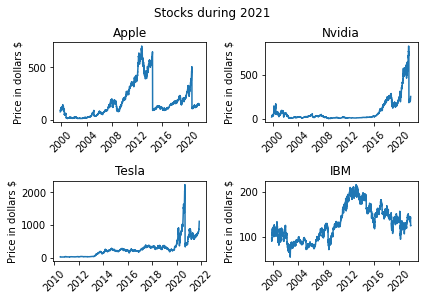

In [24]:
fig, axes = plt.subplots(2,2)
print(axes.shape)
print(axes.flatten().shape)

stock_2021 = stocks.loc["2021"]

stock_names = dict(AAPL="Apple", NVDA="Nvidia", TSLA="Tesla", IBM="IBM")
for ax, symbol in zip(axes.flatten(), stock_names):
    sns.lineplot(data=stocks, x=stocks.index, y=symbol, ax=ax)
    ax.tick_params(axis="x", rotation=45)
    ax.set(title=f"{stock_names[symbol]}", ylabel="Price in dollars $")

fig.tight_layout()
fig.suptitle("Stocks during 2021", y=1.03)